# 8.13 迁移学习/混合模型

开摆好几天，感觉学一学

昨天头疼一天，8.13继续重来

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week10/transfer_data.csv')
data.head()

,x,y
0,-5.0,25.00
1,-4.9,24.01
2,-4.8,23.04
3,-4.7,22.09
4,-4.6,21.16


In [2]:
X = data.loc[:,'x']
y = data.loc[:,'y']
X.head()

0   -5.0
1   -4.9
2   -4.8
3   -4.7
4   -4.6
Name: x, dtype: float64

In [3]:
# 数据可视化
from matplotlib import pyplot as plt

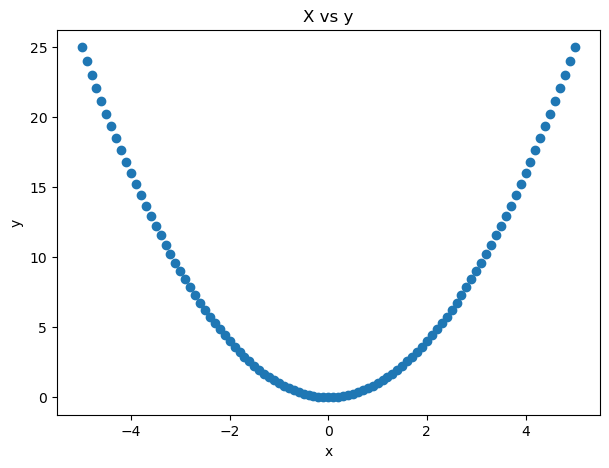

In [4]:
fig1 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [5]:
X = np.array(X).reshape(-1,1)
X.shape,y.shape

((101, 1), (101,))

In [6]:
from keras.models import Sequential
from keras.layers import Dense

model1 = Sequential()
model1.add(Dense(units=50,input_dim=1,activation='relu'))
model1.add(Dense(units=50,activation='relu'))
model1.add(Dense(units=1,activation='linear'))
model1.compile(optimizer='adam',loss='mean_squared_error')
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                100       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,701
Trainable params: 2,701
Non-trainable params: 0
_________________________________________________________________


In [7]:
model1.fit(X,y,epochs=400)

Epoch 1/400
4/4 [==============================] - 1s 2ms/step - loss: 129.6260
Epoch 2/400
4/4 [==============================] - 0s 2ms/step - loss: 123.8331
Epoch 3/400
4/4 [==============================] - 0s 1ms/step - loss: 118.8764
Epoch 4/400
4/4 [==============================] - 0s 2ms/step - loss: 114.4743
Epoch 5/400
4/4 [==============================] - 0s 1ms/step - loss: 110.1787
Epoch 6/400
4/4 [==============================] - 0s 1ms/step - loss: 105.9898
Epoch 7/400
4/4 [==============================] - 0s 2ms/step - loss: 102.0705
Epoch 8/400
4/4 [==============================] - 0s 1ms/step - loss: 97.8603
Epoch 9/400
4/4 [==============================] - 0s 2ms/step - loss: 93.4508
Epoch 10/400
4/4 [==============================] - 0s 1ms/step - loss: 89.4688
Epoch 11/400
4/4 [==============================] - 0s 1ms/step - loss: 85.0016
Epoch 12/400
4/4 [==============================] - 0s 2ms/step - loss: 80.6407
Epoch 13/400
4/4 [========================

In [8]:
y_predict = model1.predict(X)

4/4 [==============================] - 0s 998us/step


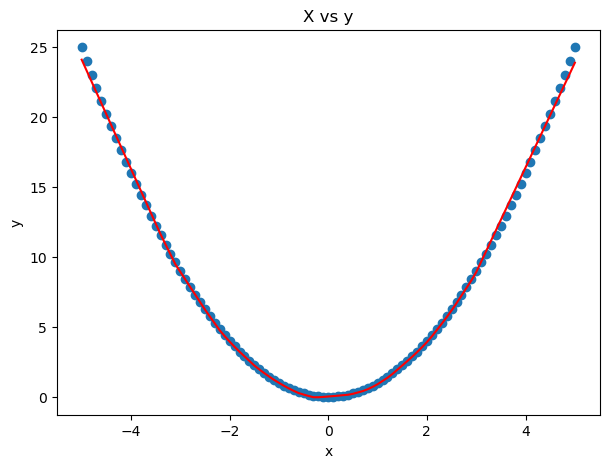

In [9]:
fig2 = plt.figure(figsize=(7,5))
plt.scatter(X,y)
plt.plot(X,y_predict,'r')
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
import joblib
joblib.dump(model1,'model1.m')

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-08-13 14:02:54         1811
metadata.json                                  2023-08-13 14:02:54           64
variables.h5                                   2023-08-13 14:02:54        52744


['model1.m']

In [11]:
model2 = joblib.load('model1.m')

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-08-13 14:02:54         1811
metadata.json                                  2023-08-13 14:02:54           64
variables.h5                                   2023-08-13 14:02:54        52744
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars


In [12]:
data2 = pd.read_csv('D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week10/transfer_data2.csv')
data2.head()

,x2,y2
0,-5.0,26.00
1,-4.9,25.21
2,-4.8,24.44
3,-4.7,23.69
4,-4.6,22.96


In [13]:
X2 = data2.loc[:,'x2']
y2 = data2.loc[:,'y2']

In [14]:
X2 = np.array(X2).reshape(-1,1)

In [15]:
y2_predict = model2.predict(X2)

4/4 [==============================] - 0s 1ms/step


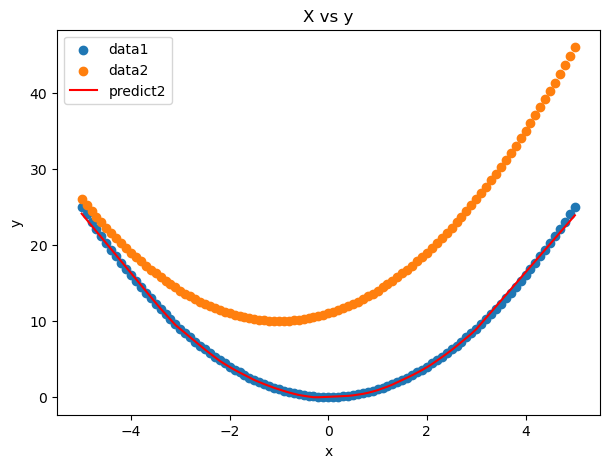

In [16]:
fig3 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [22]:
model2.fit(X2,y2,epochs=20)

Epoch 1/20
4/4 [==============================] - 0s 1ms/step - loss: 1.0754
Epoch 2/20
4/4 [==============================] - 0s 2ms/step - loss: 1.0025
Epoch 3/20
4/4 [==============================] - 0s 1ms/step - loss: 0.8443
Epoch 4/20
4/4 [==============================] - 0s 2ms/step - loss: 0.7578
Epoch 5/20
4/4 [==============================] - 0s 2ms/step - loss: 0.6831
Epoch 6/20
4/4 [==============================] - 0s 997us/step - loss: 0.6499
Epoch 7/20
4/4 [==============================] - 0s 1ms/step - loss: 0.6130
Epoch 8/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5720
Epoch 9/20
4/4 [==============================] - 0s 1ms/step - loss: 0.5532
Epoch 10/20
4/4 [==============================] - 0s 2ms/step - loss: 0.5113
Epoch 11/20
4/4 [==============================] - 0s 1ms/step - loss: 0.4792
Epoch 12/20
4/4 [==============================] - 0s 2ms/step - loss: 0.4501
Epoch 13/20
4/4 [==============================] - 0s 2ms/step - loss: 

4/4 [==============================] - 0s 997us/step


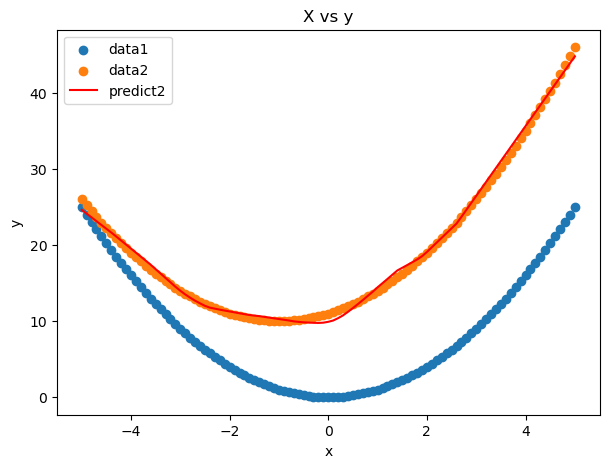

In [23]:
y2_predict = model2.predict(X2)
fig4 = plt.figure(figsize=(7,5))
plt.scatter(X,y,label='data1')
plt.scatter(X2,y2,label='data2')
plt.plot(X,y2_predict,'r',label='predict2')
plt.title('X vs y')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [25]:
from keras.preprocessing.image import ImageDataGenerator
path = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week10/original_data'
dst_path = 'gen_data'
datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.02,horizontal_flip=True,vertical_flip=True)

gen = datagen.flow_from_directory(path,target_size=(224,224),batch_size=2,save_to_dir=dst_path,save_prefix='gen',save_format='jpg')
for i in range(100):
    gen.next()

Found 10 images belonging to 1 classes.


In [26]:
# load the image
from keras_preprocessing.image import img_to_array,load_img

img_path = 'D:/Resource/EchoChao/Projects/Pycharm/learing/other_learn/week10/1.jpg'
img = load_img(img_path,target_size=(224,224))
type(img)

PIL.Image.Image

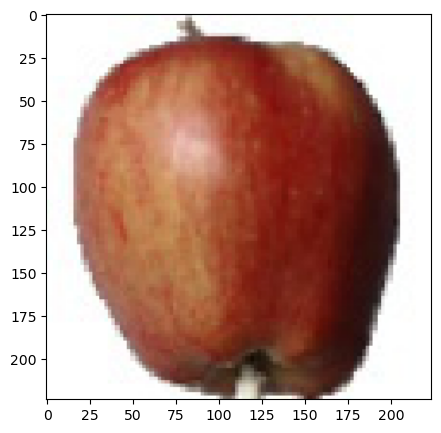

In [27]:
fig1 = plt.figure(figsize=(5,5))
plt.imshow(img)

In [28]:
img = img_to_array(img)
type(img)

numpy.ndarray

In [30]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

model_vgg = VGG16(weights='imagenet',include_top=False)
X = np.expand_dims(img,axis=0)
X = preprocess_input(X)

In [31]:
# 特征提取
features = model_vgg.predict(X)
features.shape

1/1 [==============================] - 0s 287ms/step


(1, 7, 7, 512)

In [33]:
# flatten

features = features.reshape(1,-1)
features.shape

(1, 25088)